# Imports:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Classes:

In [66]:
class EnumerationMethodRandomWalk:
    """
    the class to solve the trapping 1d random walk

    the walker goes right with possibility p and left with possibility 1-p
    the walker dies if he goes into traps
    x0 is the start ing point
    lifeTime is the mathematical hope of walkers life
    pMap is array of possibilities of the position of the walker
    age is the age if the walker ran the current stage

    methods:
    step:
        the function to add one more depth to the walk path
    getDeathPossibility:
        the function to get the sum of possibilities if the walker falls in the traps
    getLifeTime:
        the function to get the lifeTime of the walker
    """
    def __init__(self, p: float, x0: int, trap1: int, trap2: int) -> None:
        """
        the function to construct the EnumerationMethodRandomWalk object

        :param p: the possibility to go to the right(a number between 0 and 1)
        :type p: float
        :param x0: thr starting point
        :type x0: int
        :param trap1:the left trap
        :type trap1: int
        :param trap2: thr right trap
        :type trap2: int
        """
        self.p = p
        self.trap1 = 0
        self.trap2 = trap2 - trap1
        self.pMap = np.zeros(self.trap2+1)
        self.pMap[x0]=1
        self.lifeTime = 0
        self.age = 1


    def step(self) -> None:
        """
        the function to add one more depth to the walk path
        creating aa new pMap and copying the traps(in order not to forget the death possibilities
        for any position between traps slice the possibility with p and 1-p and add to the position left and right
        set the new map as the pMam
        """
        new_map= np.zeros(self.trap2+1)
        new_map[0] = self.pMap[0]
        new_map[-1] = self.pMap[-1]
        for i in range(1,self.trap2):
            new_map[i+1] += self.pMap[i]*self.p
            new_map[i-1] += self.pMap[i]*(1-self.p)

        self.pMap = new_map


    def getDeathPossibility(self) -> float:
        """
        the function to get the sum of possibilities if the walker falls in the traps
        """
        return self.pMap[0] + self.pMap[-1]

    def getLifeTime(self) -> float:
        """
        the function to get the lifeTime of the walker
        while the possibility of death is smaller than 0.9 do one more step and add to his age
        increase the lifeTime of the walker with his age times death Possibility
        :return: the lifeTime of the walker
        :rtype: float
        """
        while self.getDeathPossibility()<0.99999999999999:
            self.step()
            self.lifeTime += self.age * (1-self.getDeathPossibility())
            self.age += 1

        return self.lifeTime




#### Plotting:

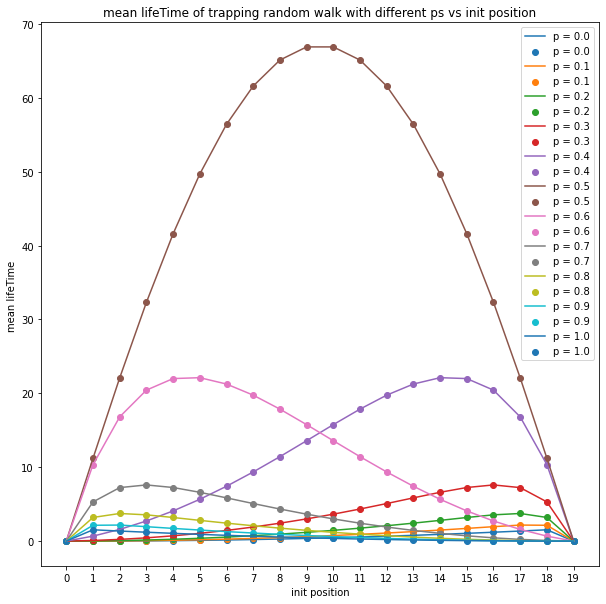

In [67]:
plt.figure(figsize=(10,10))
plt.title("mean lifeTime of trapping random walk with different ps vs init position")
plt.xlabel("init position")
plt.ylabel("mean lifeTime ")
plt.xticks(np.arange(20))
for p in np.arange(11)/10:
    data = []
    for i in range(20):
        enumerationMethodRandomWalk = EnumerationMethodRandomWalk(p,i,0,19)
        data.append(enumerationMethodRandomWalk.getLifeTime())
    plt.plot(np.arange(20),np.array(data)/100)
    plt.scatter(np.arange(20),np.array(data)/100)
plt.legend(["p = 0.0","p = 0.0","p = 0.1","p = 0.1","p = 0.2","p = 0.2","p = 0.3","p = 0.3","p = 0.4","p = 0.4","p = 0.5","p = 0.5","p = 0.6","p = 0.6","p = 0.7","p = 0.7","p = 0.8","p = 0.8","p = 0.9","p = 0.9","p = 1.0","p = 1.0"])
plt.show()